In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score,roc_auc_score,roc_curve
import seaborn as sns

from sklearn import linear_model

from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

<Axes: >

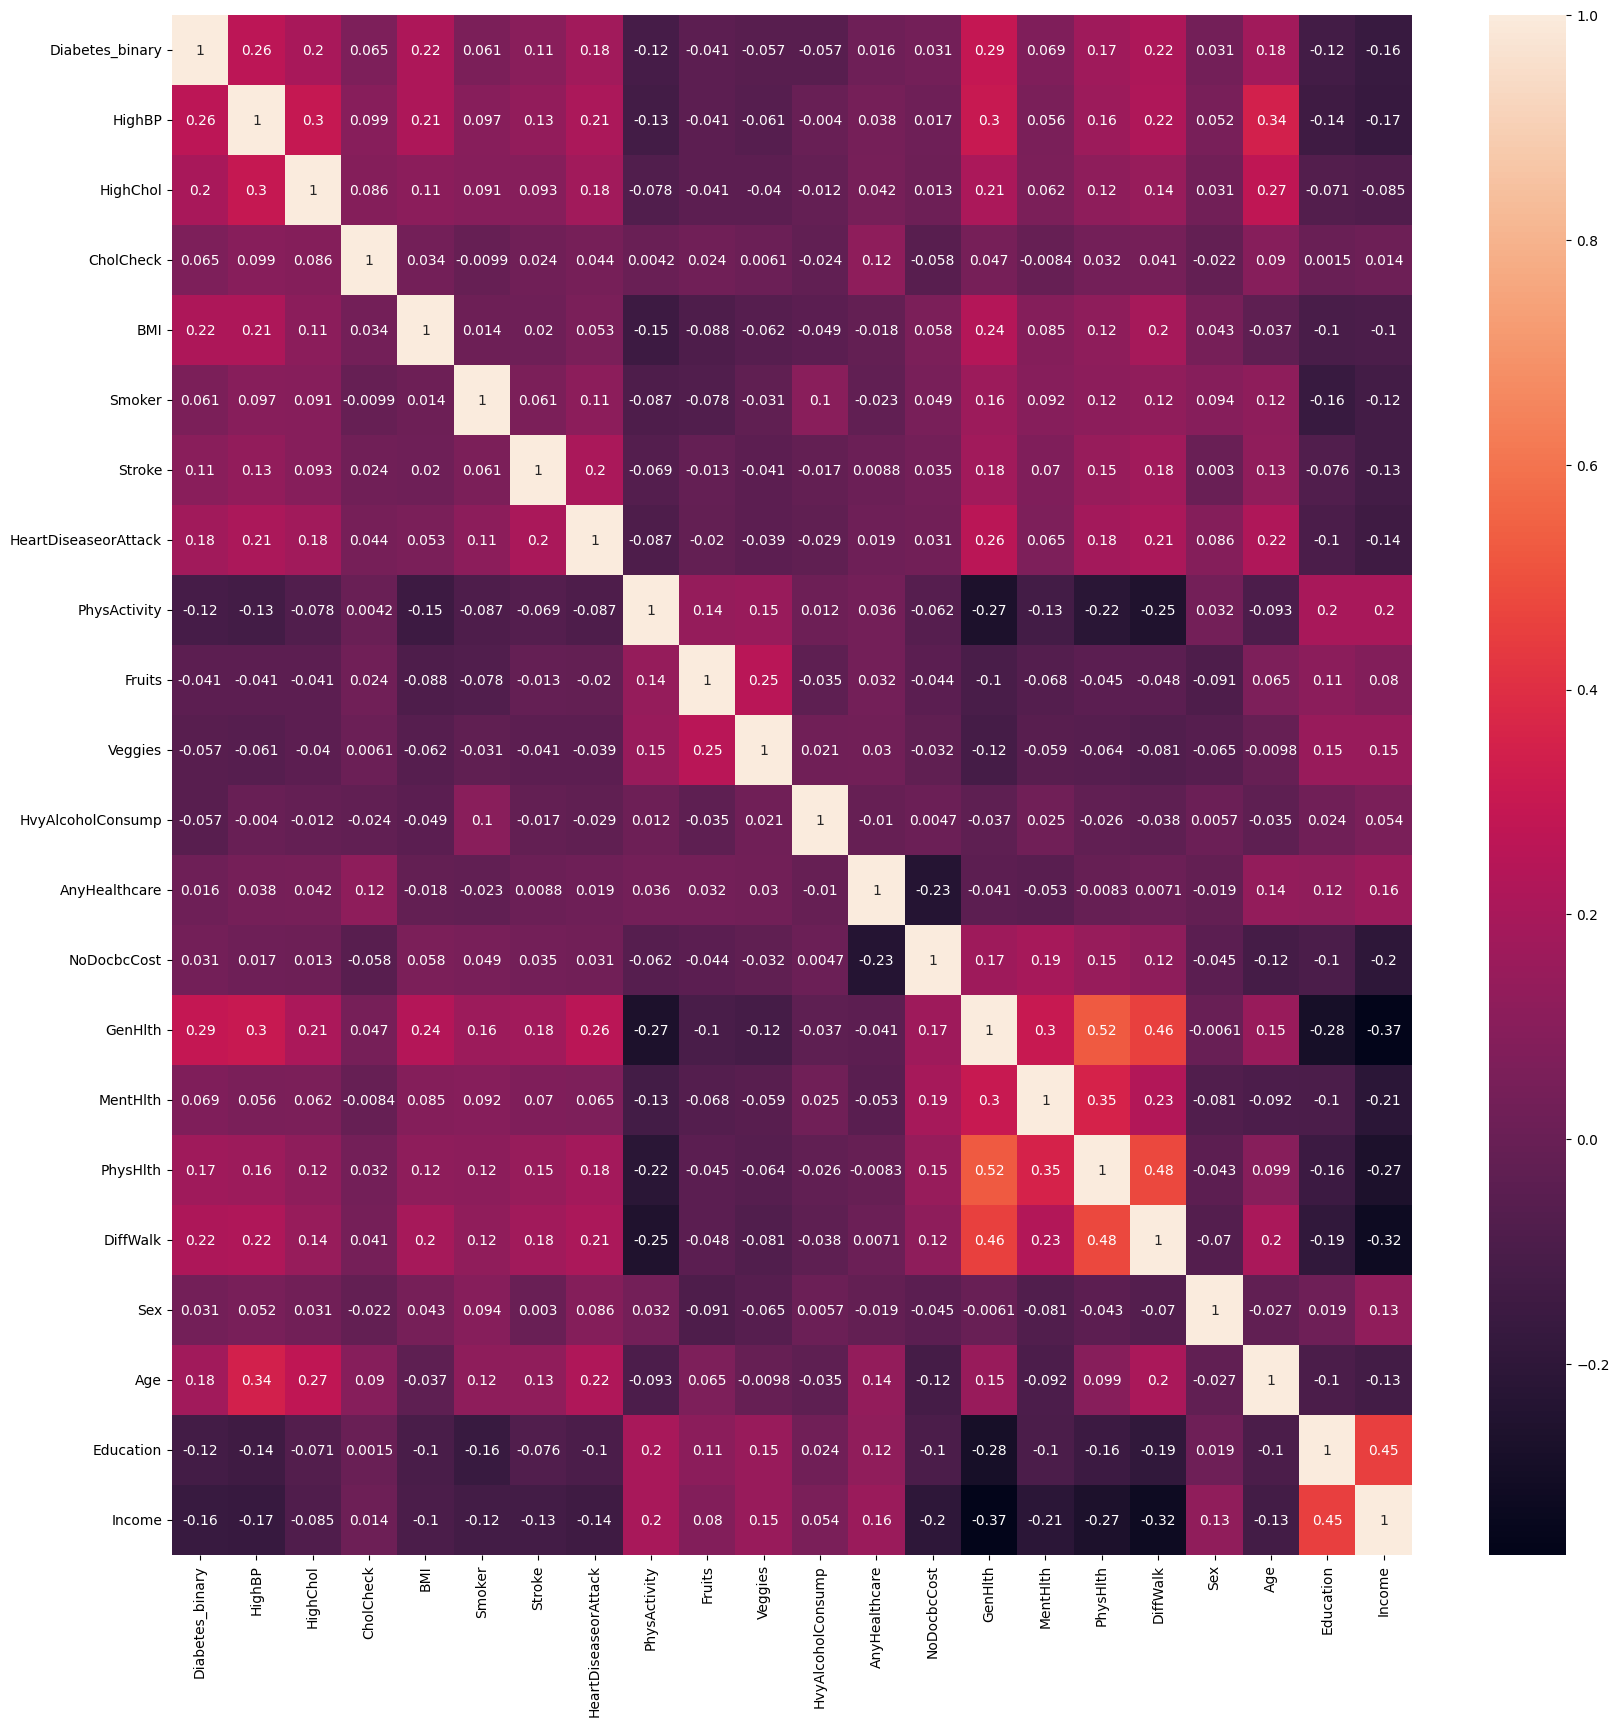

In [3]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

















### **DATA PREPROCESSING**

In [4]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Changing all the na values to 0


In [5]:

import pandas as pd

# df = pd.DataFrame(data)


df = df.dropna()


# print(df_replaced)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('Diabetes_binary',  axis=1)

y = df.Diabetes_binary

In [34]:
print(set(y))

{0.0, 1.0}


In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
from tensorflow import keras
import os



In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from collections import Counter

In [12]:
%pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [13]:
from imblearn.combine import SMOTETomek
counter = Counter(y)
#finding out the
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTETomek()
X, y = smenn.fit_resample(X, y)

counter = Counter(y)
print('After',counter)

Before Counter({0.0: 218334, 1.0: 35346})
After Counter({0.0: 218208, 1.0: 218208})


In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)  # Assuming each feature is considered a timestep

X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.3, random_state=42)

In [14]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


CONV+LSTM+

In [16]:
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Flatten, Dense
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler



#model building
model = Sequential()

# Convolutional layer
model.add(Conv1D(128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))

# LSTM layer
# LSTM layer
model.add(keras.layers.LSTM(units=64,return_sequences=True))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1)) # Adjust input shape for LSTM


# Adjust input shape for LSTM


# Compile the model (optional for SVM)
model.compile(optimizer='adam',
              loss='mean_squared_error',metrics=['accuracy'])
# Train the model (or train SVM separately)
model.fit(X_train, y_train, epochs=300, batch_size=32,steps_per_epoch=20, validation_split=0.2)

# Make predictions using the LSTM-encoded features
lstm_features_train = model.predict(X_train)
lstm_features_test = model.predict(X_test)





Epoch 1/300
20/20 [==============================] - 11s 429ms/step - loss: 0.2934 - accuracy: 0.5375 - val_loss: 0.2438 - val_accuracy: 0.6127
Epoch 2/300
20/20 [==============================] - 8s 395ms/step - loss: 0.2468 - accuracy: 0.5953 - val_loss: 0.2235 - val_accuracy: 0.6321
Epoch 3/300
20/20 [==============================] - 8s 407ms/step - loss: 0.2344 - accuracy: 0.6109 - val_loss: 0.2167 - val_accuracy: 0.6584
Epoch 4/300
20/20 [==============================] - 7s 390ms/step - loss: 0.2241 - accuracy: 0.6328 - val_loss: 0.2054 - val_accuracy: 0.6820
Epoch 5/300
20/20 [==============================] - 8s 399ms/step - loss: 0.2170 - accuracy: 0.6516 - val_loss: 0.1890 - val_accuracy: 0.7290
Epoch 6/300
20/20 [==============================] - 8s 403ms/step - loss: 0.2185 - accuracy: 0.6531 - val_loss: 0.1965 - val_accuracy: 0.6997
Epoch 7/300
20/20 [==============================] - 7s 392ms/step - loss: 0.1941 - accuracy: 0.6953 - val_loss: 0.1798 - val_accuracy: 0.739

In [23]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pred = model.predict(X_test)
pred
pred[1][0]
pred1=[]
for i in range(0,len(pred)):
  if(pred[i][0]>0.5):
    pred1.append(1)
  else:
      pred1.append(0)
print(f"Accuracy Score: {accuracy_score(y_test, pred1) * 100:.2f}%")
print(f"Precision Score: {precision_score(y_test, pred1) * 100:.2f}%")
print(f"Recall Score: {recall_score(y_test, pred1) * 100:.2f}%")
print(f"F1 Score: {f1_score(y_test, pred1) * 100:.2f}%")
print(f"AUC Score: {roc_auc_score(y_test, pred1) * 100:.2f}%")






4092/4092 [==============================] - 14s 3ms/step
Accuracy Score: 84.24%
Precision Score: 81.77%
Recall Score: 87.95%
F1 Score: 84.75%
AUC Score: 84.25%


ML BASED MOdELS

              precision    recall  f1-score   support

         0.0       0.80      0.81      0.80     65745
         1.0       0.80      0.80      0.80     65180

    accuracy                           0.80    130925
   macro avg       0.80      0.80      0.80    130925
weighted avg       0.80      0.80      0.80    130925



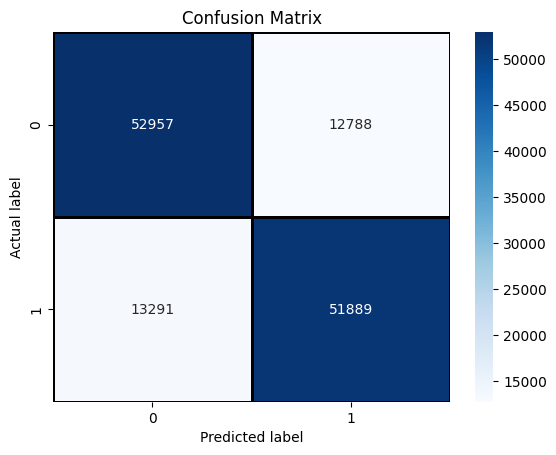

Accuracy: 0.8008096238304373
Recall: 0.7960877569806689
F1 Score: 0.7991713962281587
Precision: 0.8022790172704362


In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(lstm_features_train, y_train)

# Evaluate the model
y_pred = dt_model.predict(lstm_features_test)
accuracy = accuracy_score(y_test, y_pred)
from sklearn.metrics import classification_report



print(classification_report(y_test, (y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()


from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score0 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score0)
print("Precision:", precision)



<Axes: xlabel='Diabetes_012', ylabel='count'>

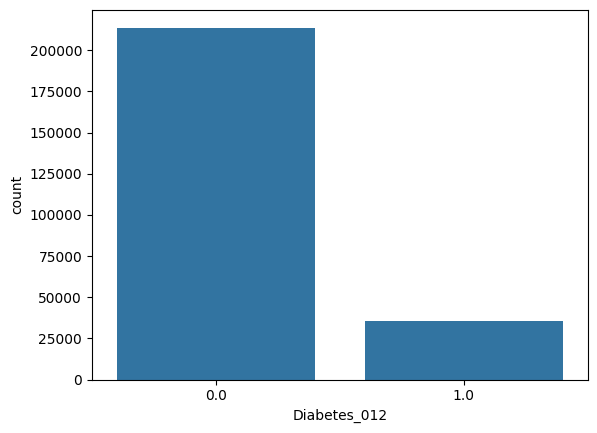

In [24]:
sns.countplot(x=y,data=df)

<Axes: xlabel='Diabetes_binary', ylabel='count'>

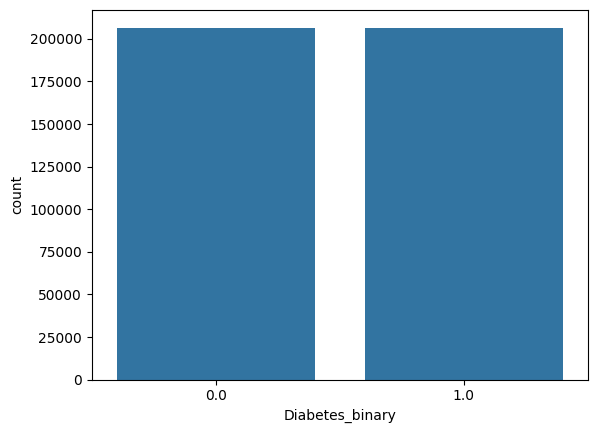

In [20]:
sns.countplot(x=y,data=df)

Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(lstm_features_train,y_train)

y_pred = rfc.predict(lstm_features_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
from sklearn.metrics import classification_report



print(classification_report(y_test, (y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()




from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)



KeyboardInterrupt: 

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85     65745
         1.0       0.85      0.85      0.85     65180

    accuracy                           0.85    130925
   macro avg       0.85      0.85      0.85    130925
weighted avg       0.85      0.85      0.85    130925



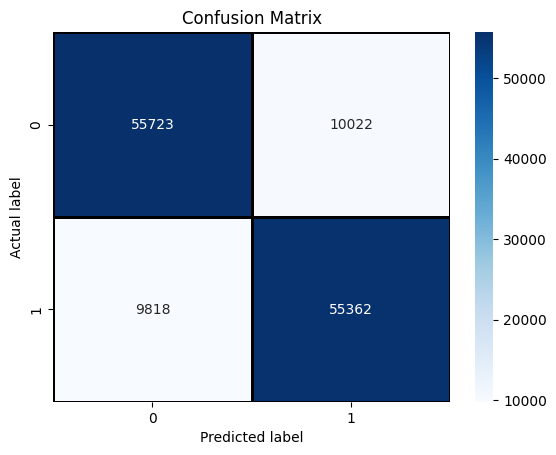

Accuracy: 0.8484628604162688
Recall: 0.8493709726910095
F1 Score: 0.8480438712049264
Precision: 0.8467209103144501


In [18]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(lstm_features_train,y_train)

y_pred = nb.predict(lstm_features_test)
from sklearn.metrics import classification_report



print(classification_report(y_test, (y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()




from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)


[LightGBM] [Info] Number of positive: 153028, number of negative: 152463
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 305491, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500925 -> initscore=0.003699
[LightGBM] [Info] Start training from score 0.003699
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85     65745
         1.0       0.87      0.82      0.85     65180

    accuracy                           0.85    130925
   macro avg       0.85      0.85      0.85    130925
weighted avg       0.85      0.85      0.85    130925



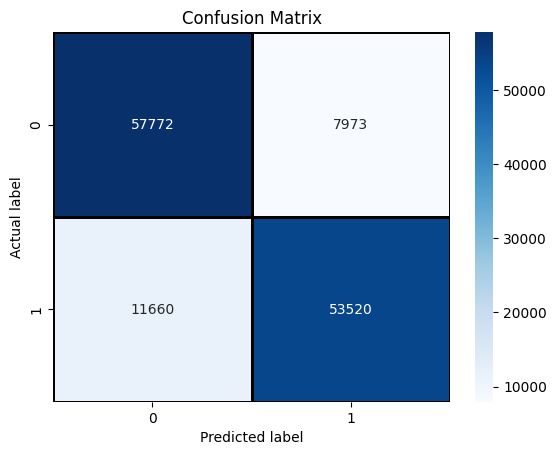

Accuracy: 0.8500439182738209
Recall: 0.8211107701749003
F1 Score: 0.8450103810598945
Precision: 0.8703429658660335


In [19]:
import lightgbm

lgbm = lightgbm.LGBMClassifier()

lgbm.fit(lstm_features_train,y_train)

y_pred = lgbm.predict(lstm_features_test)
from sklearn.metrics import classification_report



print(classification_report(y_test, (y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()




from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)


              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83     65745
         1.0       0.84      0.81      0.83     65180

    accuracy                           0.83    130925
   macro avg       0.83      0.83      0.83    130925
weighted avg       0.83      0.83      0.83    130925



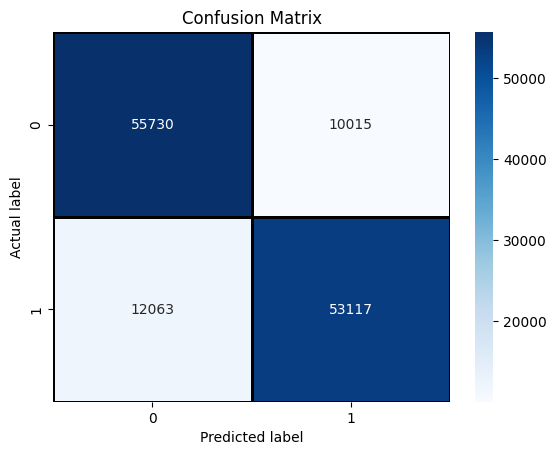

Accuracy: 0.831369104449112
Recall: 0.8149278919914084
F1 Score: 0.8279350333561943
Precision: 0.8413641259583096


In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(lstm_features_train,y_train)

y_pred = knn.predict(lstm_features_test)
from sklearn.metrics import classification_report



print(classification_report(y_test, (y_pred)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()




from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)


              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80     65745
         1.0       0.80      0.80      0.80     65180

    accuracy                           0.80    130925
   macro avg       0.80      0.80      0.80    130925
weighted avg       0.80      0.80      0.80    130925



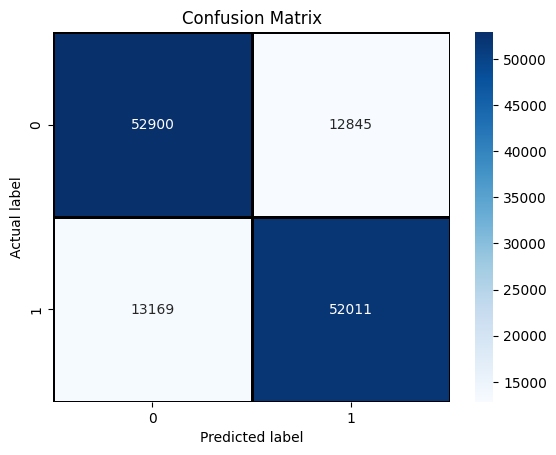

Accuracy: 0.80130609127363
Recall: 0.7979594967781528
F1 Score: 0.7999477067888892
Precision: 0.8019458492660664


In [21]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier

etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(lstm_features_train, y_train)

y_pred = etc.predict(lstm_features_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, (y_pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()



from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)



              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86     65745
         1.0       0.88      0.80      0.84     65180

    accuracy                           0.85    130925
   macro avg       0.85      0.85      0.85    130925
weighted avg       0.85      0.85      0.85    130925



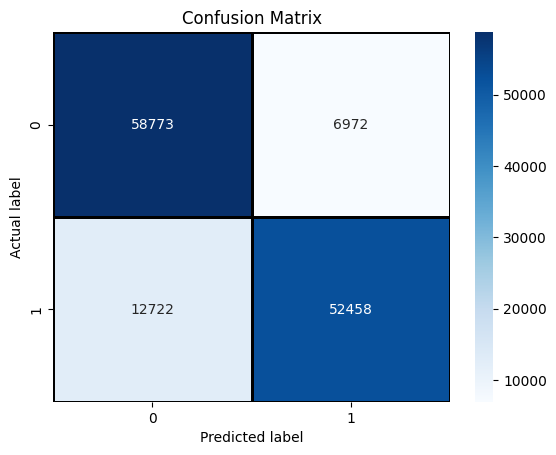

Accuracy: 0.8495780026732862
Recall: 0.8048174286590979
F1 Score: 0.8419548992857716
Precision: 0.8826855123674912


In [22]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=150)
# Train the classifier on the training data
clf.fit(lstm_features_train, y_train)
# Predict labels for the test data
y_pred = clf.predict(lstm_features_test)
# Evaluate the accuracy of the predictions
print(classification_report(y_test, (y_pred)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

# Create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d",cmap="Blues", linewidths=2, linecolor="black")

# Set the labels for the axes
plt.xlabel("Predicted label")
plt.ylabel("Actual label")

# Set the title
plt.title("Confusion Matrix")

# Show the plot
plt.show()




from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Precision:", precision)
